#자연어 처리 리뷰활용

*konlpy를 이용한 자연어 처리

*64bit mem 8G 이상요망

In [1]:
import konlpy,sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

###형태소 분석기 초기화

In [2]:
hannanum=Hannanum()
kkma = Kkma()
#komoran=Komoran() 메모리
okt=Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
c="안녕하세요 여러분"
kkma.nouns(c[:40])
hannanum.nouns(c[:40])

hannanum

In [4]:
dbname="bank11.db"

In [44]:
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [45]:
pprint(kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))


[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


In [46]:
dbname="namovie.db"

In [47]:

def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT 
        from movie1 
        where TCODE='"""+str(tcode)+"""'
        order by IDX
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            print(d,end="\n")
            
        conn.commit() #최종확인
        cur.close()
        return (xdata,ydata)
        

In [48]:
def seltitle():
    fig=plt.figure(figsize=(30,60))
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql= 'select TIDX, TNAME from titles order by TIDX'
        
        data=cur.execute(sql).fetchall()
        i=0
        for d in data:
            gdata=seldb(d[0])
            if (len(gdata[0])>1):
                #print("*"*20)
                #print(d[1])
                #print("*"*20)
                #print(d,end="\n")
                pos=divmod(i,3)
                i+=1
                plt.subplot(3,10,i)
                x_=gdata[0]
                y_=gdata[1]
                #y=wx_+b
                A=np.vstack([x_,np.ones(len(x_))]).T
                w,b = np.linalg.listsq(A,y_)[0]
                x_=np.ndarray(gdata[0])
                plt.plot(x_,y_,'ro', label="DATA")
                plt.plot(x_,w*x_+b,'b', lacel="FIT")
                plt.legend()
                
                plt.title(d[1])
        conn.commit() #최종확인
        cur.close()
        return (xdata,ydata)

In [51]:
gdata=seldb(12)
print(gdata)

(15889840, '진범', '방금 보고 나왔어요...기대하고  갔는데  지루해서 죽는줄ㅠㅠ기분좋게 갔는데 보고나니 머리가  아프네요~한국영화  발전해야합니다ㅠㅠ스파이더맨  볼껄 그랬어요... ㅠㅠ급 우울', 1)
(15889844, '진범', '심장이 쫄깃 쫄깃... 합니다.', 10)
(15889846, '진범', '약간 연극보는 느낌이 들었지만 볼만했습니다.송새벽님이 잘생겨보이다니니니니^^~', 7)
(15889858, '진범', '재밌네요.  스릴러물 좋아요..', 10)
(15889860, '진범', '한국스릴러의 결정판!!! 벌써 고정욱감독의 다음작품이 기대되네요 장마에 어울리는 영화입니다', 10)
(15889870, '진범', '출연 배우도 많지 않고 배경공간도 한정적이지만 연출과 연기력으로다 커버하고도 남았다!!  설정된 인물 관계도 안에서 펼쳐지는 스릴러가 이렇게도  긴장될 줄이야~', 10)
(15889923, '진범', '한국영화의 특징이 초반에는 잘 만들어진듯 하다가 막판에 흐지부지 정리하기 바쁜게 대부분인데 끝까지 흥미진지하게 본 영화였어요 꼭 한번 보세요 강추입니다.', 10)
(15889924, '진범', '스릴러물을 제대로다  흥하길', 10)
(15889938, '진범', '여러가지 감정선을 잘 표현한 스릴러', 10)
(15889964, '진범', '반전과 반전간만에 본 영화다운 영화', 10)
(15889991, '진범', '시나리오가 매우 탄탄하고 연기자들의 연기에 몰입이 되었네요 두번 봐도 아깝지 않은 영화입니다~~', 10)
(15889992, '진범', '넘 재밌어요~  몰입도 최고!!', 10)
(15889994, '진범', '9점은 왜 없는거죠?ㅋ배우들 연기 모두 좋았구요처음 의심했던 인물이 범인이었네요내 그럴줄 알았다니까~~~', 8)
(15890006, '진범', '영화 재미지게 봤습니다~!', 10)
(15890030, '진범', '잠오고  짜증 난다 돈이아깝다', 2)
(15904213, '진범', '부천

In [53]:
nt=[]
for s in gdata[1]:
    ns=kkma.nouns(s)
    nt.append(ns)
print(nt)

[['기대', '줄', '기분', '보고', '머리', '한국', '한국영화', '영화', '발전', '스파이', '스파이더맨', '더', '맨', '급', '우울'], ['심장'], ['연극', '느낌', '송', '송새벽', '새벽', '니'], ['스릴러', '스릴러물', '물'], ['한국', '한국스릴러', '스릴러', '결정판', '고정', '감독', '다음', '다음작품', '작품', '장마', '영화'], ['출연', '배우', '배경', '배경공간', '공간', '한정적', '연출', '연기력', '커버하고도', '설정', '인물', '관계', '안', '스릴러', '긴장', '줄'], ['한국', '한국영화', '영화', '특징', '초반', '듯', '막판', '정리', '대부분', '끝', '흥미', '흥미진지', '진지', '한번', '보세', '강추'], ['스릴러', '스릴러물', '물', '제대'], ['가지', '감정', '감정선', '선', '표현', '스릴러'], ['반전', '반전간만', '간만', '영화'], ['시나리오', '연', '연기자', '기자', '연기', '몰입', '번', '영화'], ['몰입', '최고'], ['9', '9점', '점', 'ㅋ', 'ㅋ배우', '배우', '연기', '처음', '의심', '인물', '범인', '내', '줄'], ['영화'], ['잠', '짜증', '돈'], ['부천', '영화제', '권위'], ['유선', '유선언니', '언니', '연기', '연기짱', '짱'], ['쏘쏘'], ['사람', '결혼'], ['반전', '줄거리', '범인', '누', '누군지', '군지', '느낌'], ['볼만', '듯']]


In [57]:
ntall=[]
for n in nt:
    ntall.extend(n)
print(ntall)

['기대', '줄', '기분', '보고', '머리', '한국', '한국영화', '영화', '발전', '스파이', '스파이더맨', '더', '맨', '급', '우울', '심장', '연극', '느낌', '송', '송새벽', '새벽', '니', '스릴러', '스릴러물', '물', '한국', '한국스릴러', '스릴러', '결정판', '고정', '감독', '다음', '다음작품', '작품', '장마', '영화', '출연', '배우', '배경', '배경공간', '공간', '한정적', '연출', '연기력', '커버하고도', '설정', '인물', '관계', '안', '스릴러', '긴장', '줄', '한국', '한국영화', '영화', '특징', '초반', '듯', '막판', '정리', '대부분', '끝', '흥미', '흥미진지', '진지', '한번', '보세', '강추', '스릴러', '스릴러물', '물', '제대', '가지', '감정', '감정선', '선', '표현', '스릴러', '반전', '반전간만', '간만', '영화', '시나리오', '연', '연기자', '기자', '연기', '몰입', '번', '영화', '몰입', '최고', '9', '9점', '점', 'ㅋ', 'ㅋ배우', '배우', '연기', '처음', '의심', '인물', '범인', '내', '줄', '영화', '잠', '짜증', '돈', '부천', '영화제', '권위', '유선', '유선언니', '언니', '연기', '연기짱', '짱', '쏘쏘', '사람', '결혼', '반전', '줄거리', '범인', '누', '누군지', '군지', '느낌', '볼만', '듯']


In [58]:
from collections import Counter
count=Counter(ntall)
print(count)

Counter({'영화': 6, '스릴러': 5, '줄': 3, '한국': 3, '연기': 3, '한국영화': 2, '느낌': 2, '스릴러물': 2, '물': 2, '배우': 2, '인물': 2, '듯': 2, '반전': 2, '몰입': 2, '범인': 2, '기대': 1, '기분': 1, '보고': 1, '머리': 1, '발전': 1, '스파이': 1, '스파이더맨': 1, '더': 1, '맨': 1, '급': 1, '우울': 1, '심장': 1, '연극': 1, '송': 1, '송새벽': 1, '새벽': 1, '니': 1, '한국스릴러': 1, '결정판': 1, '고정': 1, '감독': 1, '다음': 1, '다음작품': 1, '작품': 1, '장마': 1, '출연': 1, '배경': 1, '배경공간': 1, '공간': 1, '한정적': 1, '연출': 1, '연기력': 1, '커버하고도': 1, '설정': 1, '관계': 1, '안': 1, '긴장': 1, '특징': 1, '초반': 1, '막판': 1, '정리': 1, '대부분': 1, '끝': 1, '흥미': 1, '흥미진지': 1, '진지': 1, '한번': 1, '보세': 1, '강추': 1, '제대': 1, '가지': 1, '감정': 1, '감정선': 1, '선': 1, '표현': 1, '반전간만': 1, '간만': 1, '시나리오': 1, '연': 1, '연기자': 1, '기자': 1, '번': 1, '최고': 1, '9': 1, '9점': 1, '점': 1, 'ㅋ': 1, 'ㅋ배우': 1, '처음': 1, '의심': 1, '내': 1, '잠': 1, '짜증': 1, '돈': 1, '부천': 1, '영화제': 1, '권위': 1, '유선': 1, '유선언니': 1, '언니': 1, '연기짱': 1, '짱': 1, '쏘쏘': 1, '사람': 1, '결혼': 1, '줄거리': 1, '누': 1, '누군지': 1, '군지': 1, '볼만': 1})


(0.0, 1.0, 0.0, 1.0)

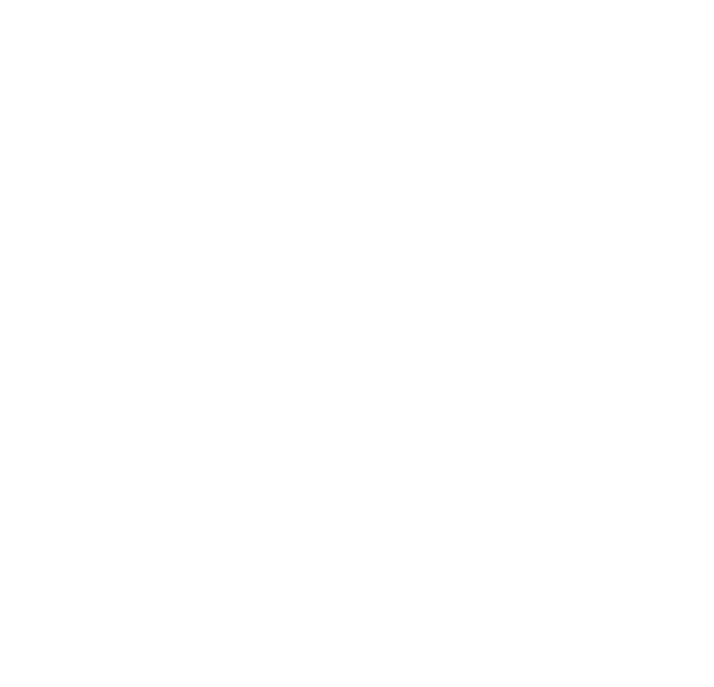

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.axis('off')

In [74]:
from wordcloud import WordCloud
from konlpy.corpus import kolaw
c=kolaw.open('constitution.txt').read()
print(c[:100])

ModuleNotFoundError: No module named 'wordcloud'

In [62]:
w=WordCloud().generate(c)

NameError: name 'WordCloud' is not defined

In [71]:
w.words_
print(w)

NameError: name 'w' is not defined

In [72]:
plt.imshow(w, interpolation='bilinear')

NameError: name 'w' is not defined